# Task 2 - Performance Evaluation

## Recap of Termin 1 for Exercise 2
At this point we will explain a section of code that will be very useful throughout this document.
This section of code is as follows:

```python
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
```



```python
filename = 'data/pima-indians-diabetes.data.csv'
```
In the first line we find the declaration of the variable __filename__, which will contain the string corresponding to the path of the .csv file which in turn contains the data.


```python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```
Then __names__ is defined, which is a list of strings, these words are __attributes__ that the database has, we must know in advance the name and order of the attributes in the database.


```python
dataframe = read_csv(filename, names=names)
```
At this point we get to the *read_csv* function, this function is part of the *pandas* module.
In this case, the function is passed two parameters:
the string that contains the path of the database and
the vector that contains the names and correct order of the attributes. This vector will be used as the name for the columns in the database.

The read_csv function returns a dataframe, which is the main data structure in pandas; it will be saved in the 'dataframe' variable.



```python
array = dataframe.values
```
As we are more comfortable working with arrays (to be more specific: numpy-arrays), we convert the dataframe into an array and store it in a variable.


```python
X = array[:,0:8]
Y = array[:,8]
```

Then, this array will be divided into 2 arrays:
X, which will contain the rows from 0 to 7, and
Y, that should contain the entire row of column 8.

What the ':' character does, is described in the following link:  
https://docs.scipy.org/doc/numpy-1.10.1/reference/arrays.indexing.html#basic-slicing-and-indexing


# Performance Evaluation

## 0. Machine Learning and its Applications

### 0.1. Introduction

We begin this section by defining some key concepts that we will use throughout this exercise.

__Dataset:__ A collection of data is called a dataset. In general it is organized in a table form. Every row represents an item that can have multiple features. Every coloum represents one feature.


__Descriptive analytics:__ It is the precursor of _predictive analytics_ and is based on obtaining and summarizing information from past events. Basic descriptive analytics techniques include counts, sums, averages, percentages, min, max and simple arithmetic (+, −, ×, and ÷).  


__Predictive analytics:__ Is the result of further development of the concept _descriptive analytics_. Its goal is, based on the analysis of historical data, to make predictions about the future or about unknown events. Specific models or algorithms are used to achieve this.

![Imagen predictive analytics](images/predictive_analytics_in_a_pic.png)

__Machine learning:__ Is an approach for solving _predictive analytics_ problems. Instead of applying explicitly dictated rules to process data, machine learning tries to figure out the underlying general concepts of the relationships in the dataset. These methods are able to vastly outperform traditional rule-based programming in many tasks, but have their own complications and disadvantages that need to be considered carefully.


In this exercise you will learn to apply machine learning approaches to make educated (learned from training data) guesses for prediction.

In machine learning a _predictive model_ learns its parameters from training data. Using this, the system is able to create predictions from input data. A special feature of many machine learning algorithms is the ability to interpolate and extrapolate information from the training data. However, there are several limitations to the generalization and the model will probably work best with data similar to the training data. Therefore, we will generally split our data in training, test and validation. These three concepts are important for almost all tasks in machine learning and will be defined in the following:


- Training data: The data and examples used for optimizing the model's parameters. 
- Test data: Usually we are interested in how well the machine learning algorithm performs on data that it has not seen before, since this determines how well it will work when deployed in the real world. We therefore evaluate these performance measures using a test set of data that is separate from the data used for training the machine learning system. (Lock this one away and only evaluate at the end of your optimization once! You do not want to train with test data...)
- Validation data: The validation set is used to estimate the generalization error during or after training, allowing for the hyperparameters (e.g. learning rate, k, tree-depth, batch-size, ...) to be updated accordingly and independently of test and training data. Therefore, it is important to split the validation data from test and training data. Typically, one uses about 80% of the training data for training and 20% for validation.

<!--- www.digitalistmag.com/digital-economy/2018/03/15/differences-between-machine-learning-predictive-analytics-05977121 -->

The goal of _predictive modeling_ is to create models that are good in forecasting. This is achieved by training the model using the training data. Testing the performance using the test data. And optimizing the hyperparameters using validation data. __However, in this exercise there will be no hyperparameters optimized.__ Accordingly, there is no validation set used and all data is used for training and test. You will learn different methods to split the data in training and test sets and how to use the data to train your machine learning model.

There are multiple algorithms/networks, which can be used as predictive models, prominent examples are:
- K-Nearest Neighbor algorithm
- Neural Networks (Multi Layer Perceptrons MLPs)
- Convolutional Neural Networks (CNNs)
- Recurrent Neural Networks (RNNs)
- And many more


![xkcd.png](images/xkcd.png)


### 0.2 Regression Problems
In the scope of regression problems, a machine learning model needs to predict a _quantity_ (continous value) for new data. In practice, this works by fitting a function to a known set of datapoints. The prediction of the model is nothing more than the output of the function to a new input.

Commonly used regression methods are _linear regression_ and _logistic regression_.
Linear functions are easy to fit and to understand. However, the accuracy might not be the best if the underlying relationship in the data is nonlinear. Logistic regression fits a logistic sigmoid curve to the given data. This is normally used to approximate a probability function, which can later be used as the basis for a classification decision.


![linear_logistic_regression](images/linear_logistic_regression.jpeg)


### 0.3. Classification Problems
Classification problems consist of predicting a discrete class or category for new data. 
To solve a classification problem, it is possible to first create a model using regression. However, for classification, different metrics and model functions (e.g. logistic) are chosen. Additionally, classification thresholds are applied to the model prediction for a discrete output.

![regression_classification_weather_example](images/regression_classification_weather_example.jpeg)
<p style="text-align: center;">
    Fig. 1 - Regression and classification on the basis of weather forecast
</p>



Both Regression and Classification problems can be solved with _supervised learning_ methods.  In this approach, both the input and the corresponding solution (label) have to be known beforehand. Inputs and labels are then given to the algorithm, which learns some general conceptual relationship between inputs and solutions until it is able to give a sensible output to novel inputs.


### 0.4. Clustering Problems
_Unsupervised learning_ methods like clustering do not need a solution set to work. We will not focus on their performance metrics here because it requires more in-depth knowledge. You will learn about them in Task 4.






## 1. Evaluation Concepts in Machine Learning

Machine Learning today is a lot like the Wild West: there’s endless opportunity and excitement, but also a lot of chaos and confusion. If you’re new to applied machine learning, evaluating a machine-learning model can seem pretty overwhelming. Hopefully this notebook will help you. In this section we will explore Overfitting and Underfitting, Splitting data and Cross-Validation. 

## 1.1. Overfitting and Underfitting


__Overfitting and Underfitting in Machine Learning__

We always have to consider that we are designing a machine learning model and not a 'classical' algorithm. In general we can say that a well designed model will be able to generalize even to all possible kinds of data inputs of the domain. Let us give you an example: An image classifier trained on dogs, which is generalizing well enough, will be able to classify a Husky as a dog despite no Huskies present in the training data. The same principle works for predictions. A well generalized model will be able to make fine predictions based on data it has never seen before as long as the data is not completely different from its structure or nature.


It is important for us to know whether our model is generalizing well, or not. You could say, that it is important to build a fit model for the problem domain. This, however, is highly dependent on many factors. In machine learning the terms ‘Overfitting’ and ‘Underfitting’ are describing two problems related to the ability of the model to generalize.

Underfitting:
A statistical model or a machine learning algorithm is said to underfit when it cannot capture the underlying trend of the data. Underfitting destroys the accuracy of our machine learning model. Its occurrence means that the model or algorithm does not fit the data well enough. If the model underfits, it is not complex enough to capture the properties of the data (e.g. using a linear model on non-linear data). If your model underfits consider the selection of your ML method or try to adjust the hyperparameters. Often it can be helpful to reduce the amount of data and try to overfit in order to figure out whether the model selected is even possible to represent the available data.


Overfitting:
A statistical model is said to be overfit if the model is representing the train data well, but is not able to generalize to new, never seen, data. A typically trait of overfitted models is for example, that they even learn artifacts of the data, like its specific noise pattern. Therefore, overfitted models are in general very complex and high in dimension. Usually they will have an outstanding performance when shown familiar data and almost no performance on new data. In regression, overfitting can be avoided by selecting the right model parameters. For example: Select a linear regression model (not a non-linear) if you expect a linear model.

<!--- 
link: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
-->

A model that works well should suffer from neither underfitting nor overfitting, but its behavior should be located between these two. Sometimes referred to as the Goldilocks principle of machine learning.
An easy example is the orbit of the earth. It is not too far from the sun and therefore the temperatures are not too cold for liquid water on the surface. If it would be too close to the sun, it would be too hot for any liquid water. Ultimately, we know that we are neither too close nor too far; therefore, the position of planet earth is in the Goldilocks zone.

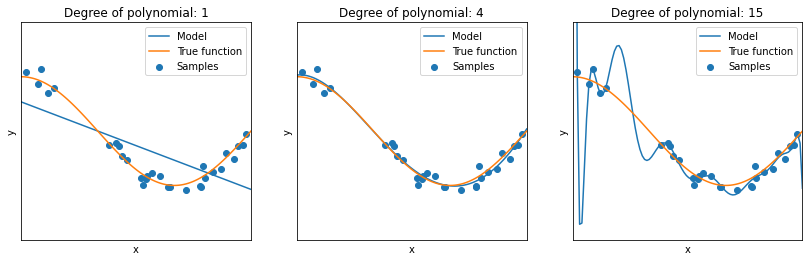

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from typing import *


np.random.seed(0)

n_samples = 30

degrees = [1, 4, 15] #Try other polynomial-degrees!

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree of polynomial: %s' % degrees[i])
plt.show()

_If you don't get images directly above this text, run the cell again. You might change the values for degrees._
<div class="alert alert-block alert-success">
<b>Question:</b> Which model degree is representing overfitting, which underfitting and which model degree is fit? 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The first picture is underfitting, second is a pretty nice fitting and the last one is overfitting the data</div>


## 1.2. Splitting Datasets into Training and Test Sets

When you’re working on a model and want to train it, you obviously have a dataset. But after training, we have to test the model on some test dataset. For this, you want to have a test set which is different from the training set you used earlier. But it might not always be possible to have a lot of data early in the development phase.

In such situations, the most obvious solution is to divide the data set you have into two groups, one for training and one for testing; and you do that before you start training your model. One Part will be used to train the model. Once the machine is trained, we will compare the predictions to estimate the performance of the model.

The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing. A split ratio of 80/20 is also very common.  

This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative with respect to the underlying problem. Because of speed, it is useful to use this approach when the algorithm you are investigating is slow in training or inference. 
A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.

<div class="alert alert-block alert-success">
<b>Task:</b> Run the following code block and experiment with the checkboxes. Use your gained knowledge to solve the following tasks.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Execute the code in the next code block. The code performs a linear regression for an exemplary diabetes dataset. More information about this dataset can be found at: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html or at the complete paper http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf (be warned, it is about 44 pages, it is not recommended to read everything). Also, the code creates an interactive diagram to help you solve the first task.
</div>

In [55]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from ipywidgets import interact, interactive, fixed, interact_manual

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

def f(p1, p2, p3, p4):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

    # Plot outputs
    if p1 == True:
        plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
    #plt.scatter(diabetes_X_train, diabetes_y_pred, color='blue')
    
    if p2 == True:
        plt.scatter(diabetes_X_test, diabetes_y_test,  color='green')

    if p3 == True:
        plt.scatter(diabetes_X_test, diabetes_y_pred, color='blue')

    if p4 == True:
        plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)
    
    plt.xlim(-0.10997004779892904, 0.19024997788107048)
    plt.ylim(8.940894039735102, 362.05910596026484)
    
    # this hides the numbers on the axis
    #plt.xticks(())
    #plt.yticks(())

    plt.show()
    
interactive_plot = interactive(f, p1=True, p2=True, p3=True, p4=True)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


Coefficients: 
 [938.23786125]


interactive(children=(Checkbox(value=True, description='p1'), Checkbox(value=True, description='p2'), Checkbox…

<div class="alert alert-block alert-success">
<b>Task/Question:</b> Complete the following text to be consistent with the help of the table below and the interactive graph above, then, complete the table.



The following text describes the steps to create a predictive model for a linear regression: <br>
<br>
By examining ??? and ???, you can take a glimpse of the entire dataset.  In the diagram above, the separation of the data is represented by different colors. Typically the data set is divided into train, test and validation, but for simple models a basic test train split can also be used. As a general rule the train set (80%) is larger than the test set (20%).
After the split, the trainings set is passed to the linear regression model.The linear regression model has a parameter that creates a linear function. You can show this function by clicking ???.<br>
<br>
Then, we will use this line to calculate the values of y for the values of x of the test subset, these points are represented by ???.  
<br>
Obviously all those points will be located on the line. In a next step, different metrics can be calculated, that would give us an idea of how well this model works with this data. With these metrics we would compare this model with others or with other parameters for this model.  
<br>
When we finish choosing the model and its parameters, we will retrain the model, this time using the complete database. 
</div>

|         -          |        -                     |
|--------------------|------------------------------|
| Train dataset      | p1                    |
|--------------------|------------------------------|
| Test dataset       | p2                   |
|--------------------|------------------------------|
| Predicted dataset  | p3                    |
|--------------------|------------------------------|
| Regression function | p4                   |


<div class="alert alert-block alert-success">
<b>Answer:</b></div>























<div class="alert alert-block alert-success">
<b>Task:</b> Now it's time to write your own train split function. Use the following instructions and the given code template.
<ul>
<li> The function will receive the original dataset and return the two partitions/variables (named train and test).
<li> Also this function will receive a number between 0 and 1, which will represent the procentual size relationship between "train" and "test". That is, if for example, split = 0.7, 70% of the data will be used for training and the remaining 30% will be reserved for testing.
<li> We want the partition to be random, so you will probable need to import from the module <i>"random.py"</i> (which is part of the <i>Python standard library</i>) the functions <i>seed</i> and <i>randrange</i>. The <i>seed</i> function will allow the result of <i>randrange</i> each time the code is executed to be the same.
<li>A good practice would be to create a copy of the original dataset inside the function. That way the original dataset wouldnt be modified, then take some of the rows of that dataset and put them on another list and then return both, which is train and which test is up to you to decide.
</ul>
</div>

In [74]:
# Example of Splitting a Contrived Dataset into Train and Test
from random import seed
from random import randrange
from random import shuffle


# Split a dataset into a train and test set
def my_train_test_split(dataset: List[Any], split: float) -> Tuple[List[Any], List[Any]]:
    train: List[Any]
    test: List[Any]
    #STUDENT CODE HERE (2pt)

    shuffle(dataset)
    n_train = int(split*len(dataset))
    train = dataset[0:n_train]
    test = dataset[n_train:]


    #STUDENT CODE until HERE
    return train, test

<div class="alert alert-block alert-success">
<b>Task:</b> Test your train test_split_function with the following example: 
</div>

In [85]:
# test train/test split
seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]  # Dataset is 1 indexed.
train, test = my_train_test_split(dataset,0.7)
print(train)
print(test)

[[7], [9], [10], [8], [6], [4], [1]]
[[5], [2], [3]]


There are many methods to perform the process of dividing the dataset (into train and test subsets) and evaluating the model of which we just talked about.
In this section we will learn the two main methods, which are:
- split, train and test
- k-fold cross validation

There are also some other methods but these two are the foundations.  
These two are some of the called __resampling methods__, which are statistical methods that allow to __estimate__ the performance of the model, how well it will perform, how good are their predictions.
The goal of resampling methods is to make the best use of your training data in order to accurately estimate the performance of a model on new unseen data.  

They are called resampling methods because they resample the available training data as a mean to measure how good is the predictive method.  

Once we reached an accurate estimation of the performance of the model, we can use that to help us choose which set of model parameters to use or which model to select.  
Once we have chosen a model, we can train the final model on the entire training dataset and start using it to make predictions.  
At the end of this section, we will learn when to use which resampling method.

A common feature of all resampling methods is the need to randomly select the rows for the Training Test and Validation dataset
This is an attempt to ensure that the training and evaluation of a model is objective.  
If multiple algorithms are compared or multiple __configurations__ of the same algorithm are compared, the exact same train and test split of the dataset should be used (reproducibility). This is to ensure that the comparison of performance is consistent and we compare apples-to-apples. We can achieve this by fixing the __random seed__ of the random number generator the same way before splitting the data, or by holding the same split of the dataset for use by multiple algorithms.  

## Exercise:
After you have successfully written your first train/split function, you are now officially allowed to use train/split-function provided by the Scikit-Learn library. Scikit-Learn sklearn is a common used library, which will booooooost your productivity. 
It is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find a selection of functions in the Scikit-Learn cheatsheets on Ilias or online. After you've finished exploring the cheatsheet, answer the following question: 

<div class="alert alert-block alert-success">
<b>Question:</b> What function would you choose to split the dataset? Which Library would you import?
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b>the funktion is train_test_split from the sklearn.model_selection library </div>


<div class="alert alert-block alert-success">
<b>Question:</b> What are the input parameters of the function and what is its return value?
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b>As input we have : the dataset, test_size, train_size, train_size, shuffle, stratify. As output we have 2 list corresponding to our train and test dataset   </div>



Now it's time for using the function. First we will use the function on a constructed dataset (just the numbers from 1 to 10).
The size of the test set must be adjusted to 20%.

<div class="alert alert-block alert-success">
<b>Task:</b> Write and test your solution in the following code block.
</div>

In [95]:
# Example of Splitting a Contrived Dataset into Train and Test
from random import seed
from random import randrange
from sklearn.model_selection import train_test_split

# test train/test split
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]

#STUDENT CODE HERE (1pt)

train,test = train_test_split(dataset,test_size = 0.2,random_state=1)

#STUDENT CODE until HERE

print(train)
print(test)

[[7], [5], [1], [4], [2], [8], [9], [6]]
[[3], [10]]


## Exercise: Pima Indians Diabetes Data Set
The Dataset is available on Ilias. The original paper using this dataset can be found here:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/ 
This paper from 1984 created a Neural Network model for the onset of diabetes mellitus in a high risk population of Pima Indians, with a sensitivity and specificity of 76%.

__Data Set Information:__

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Feature Information:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Now that you know the features of the dataset, we start coding. 

<div class="alert alert-block alert-warning">
<b>Solve the subtasks 1-3 in the corresponding code blocks below</b> 
<ul>
  <li>Import the csv-file containing the Pima Indians dataset (use abbreviations for the attributes)</li>
  <li>How many Indians have no diabetes (class = 0) or have diabetes (class = 1)? What is the proportion/ratio of these two quantities?</li>
  <li>Perform a dataset split using the train_test_split method from sklearn with the test size of 0.25 <br> (respectively a train size of 0.75) and a random_state = 0.</li>
</ul>
</div>


In [96]:
# loading Libraries
from pandas import read_csv
import pandas as pd
import numpy as np

#SUBTASK 1: Load the pima-indians-diabetes dataset

#STUDENT CODE HERE (1pt)

filename = 'data/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data: pd.DataFrame = read_csv(filename, names=names)
#STUDENT CODE until HERE

In [98]:
#SUBTASK 2:

#How many Indians have diabetes (class =1) or have no diabetes (class = 0)? 
#What is the proportion of these two quantities?
#Hint: the easiest way is to use the groupby method in combination of the size method
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

#STUDENT CODE HERE (1pt)
x = data.groupby(by = ["class"]).groups
#STUDENT CODE until HERE

print('Number of Indians without diabets: ')
#STUDENT CODE HERE (1pt)
print(x[0].size)
#STUDENT CODE until HERE

print('Number of Indians with diabets: ')
#STUDENT CODE HERE (1pt)
print(x[1].size)
#STUDENT CODE until HERE

print('Ratio of Indians with diabetes over those without diabetes: ')
#STUDENT CODE HERE (1pt)
print(x[1].size/x[0].size)
#STUDENT CODE until HERE

Number of Indians without diabets: 
500
Number of Indians with diabets: 
268
Ratio of Indians with diabetes over those without diabetes: 
0.536


In [99]:
#SUBTASK 3: 

#Divide the dataset into training and testing data using the train_test_split function

#STUDENT CODE HERE (1pt)
train,test = train_test_split(data,test_size = 0.2)
#STUDENT CODE until HERE

print('Number of elements in the testset: ')
#STUDENT CODE HERE (1pt)
print(len(test))
#STUDENT CODE until HERE

print('Number of elements in the trainingset: ')
#STUDENT CODE HERE (1pt)
print(len(train))
#STUDENT CODE until HERE


Number of elements in the testset: 
154
Number of elements in the trainingset: 
614


<div class="alert alert-block alert-success">
<b>Extra Cookie Question:</b> Which Indian woman (ID) had the thickest arm? (Cookies for correct answer!)
</div>

In [100]:
#STUDENT CODE HERE (1pt)

z = data.groupby(by = ["skin"]).groups
max(z)
print(z[max(z)])
data.iloc[z[max(z)]]

#STUDENT CODE until HERE

Int64Index([579], dtype='int64')


,preg,plas,pres,skin,test,mass,pedi,age,class
579,2,197,70,99,0,34.7,0.575,62,1


<div class="alert alert-block alert-success">
<b>Question:</b> What would be the disadvantage if the distribution of the classes (in our dataset class 0/1) would be different in the training set compared to the test set? For example, if class 1 took up 80% of the training data set but only 20% in the test data.

</div>

<div class="alert alert-block alert-success">
<b>Answer:The Model would be better in recognicing class 1 and worse in recognicing class 0 so it would wrongly classify 0s as ones. </b></div>



## 1.3. Stratification Sampling

Stratified sampling aims at splitting one data set so that each split is similar with respect to something.

In a classification setting, it is often used to ensure that train and test sets have approximately the same percentage of samples of each target class as the complete set.

<div class="alert alert-block alert-success">
<b>Task:</b> Add the stratify parameter to the train_test_split method. 
</div>

In [101]:
#Save features and targets in a separate data structure
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
target = ['class']
features, targets = data[features], data[target]

#Use the train_test_split function for splitting data.
#Task: Add the correct stratify parameter to the function call

train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.75,
        test_size=0.25,
        random_state=41, # important for later, do not change yet
        #STUDENT CODE HERE (1pt)
        stratify= targets
        #STUDENT CODE until HERE
    )

print('Proportion of {} in test and train dataset'.format(targets))
print('Training:', np.bincount(train_targets.values.flatten()) / float(len(train_targets)))
print('Test:', np.bincount(test_targets.values.flatten())/ float(len(test_targets)))

Proportion of      class
0        1
1        0
2        1
3        0
4        1
..     ...
763      0
764      0
765      0
766      1
767      0

[768 rows x 1 columns] in test and train dataset
Training: [0.65104167 0.34895833]
Test: [0.65104167 0.34895833]


<div class="alert alert-block alert-success">
<b>Question:</b> What have we achieved through the Data Stratification again? View the output of the previous code block and describe it with your own words. 

(Discuss this with your partner, before you start googling something like: "stratification machine learning")
</div>


<div class="alert alert-block alert-success">
<b>Answer:We now have a test and a train split with  an amount of class 1/0 repressenting the amount of class 1/0 in the whole dataset </b></div>


## 1.4. Cross-Validation

Cross validation methods can be classified in:
- __exhaustive:__ Data is split in training and validation subsets. All possible ways of dividing the data are explored.  Belonging to this group we will learn:
    - Leave One Out Cross-Validation (a special case of the "Leave-p-out cross-validation")

- __non-exhaustive:__ The method will not compute all possible ways of splitting the data.  Famouse examples are: 
    - k-fold cross-validation
    - Repeated Random Test-Train Splits
    - Holdout method

## 1.4.1. k-fold Cross-Validation

The _k-fold cross-validation_(k-fold CV) method is a resampling method that provides a more accurate estimate of algorithm performance, that means, with less variance than a single train-test set split.  

It does this by first splitting the dataset into k groups. Each group of data is called a fold, hence the name k-fold cross-validation.

In the image below, you can see that each row represents a fold and each column represents a train and test iteration. For example, in the first iteration (Model 1) the fold 1 will be the test fold and the others the training folds.
![Imagen K-fold](images/K-fold_cross_validation_EN.jpg)

The algorithm is then trained and evaluated k times and the performance summarized by taking the mean performance score of all those evaluations.. 

The algorithm is trained on k − 1 folds of the data and then tested on the kth held back fold. 
This is repeated so that each of the k folds of the dataset is given a chance to be held back and used as the test set. But be aware that there are also trained k seperated models, so that a test set is never used for training one model.

As such, the number of rows in your training dataset should be divisible by the value of k, to ensure each of the k groups has the same number of rows.  

You should choose a value for k that splits the data into folds with enough rows so that each fold is still large enough to be a good representative of the original dataset. However, it should always provide enough folds so that the number of repetitions of the train-test evaluation of the algorithm is sufficient to provide a fair estimate of the performance of the algorithms.

For modest sized datasets (hundreds, thousands or tens of thousands of rows), a good default to use is k=3 for a small dataset or k=10 for a larger dataset. A quick way to check if the fold sizes are representative is to calculate summary statistics such as mean and standard deviation and see how much the values differ from the same statistics on the whole dataset.

We can calculate the size of each fold as the size of the dataset divided by the number of folds required:  

$ \textrm{fold size} = \frac{\textrm{Number of rows}}{\textrm{k}} = \frac{\textrm{Number of rows}}{\textrm{Number of folds}} = \frac{count(rows)}{count(folds)} $

If the dataset does not cleanly divide by the number of folds, there may be some remainder rows and they will not be used in the split.

After running cross-validation, you end up with k different performance scores that you can summarize using a mean and a standard deviation.  

The result is a more reliable estimate of the performance of the algorithm on new data. It is more accurate because the algorithm is trained and evaluated multiple times on different data.

<div class="alert alert-block alert-success">
<b>Tip:</b> If you are having trouble understanding k-fold Cross-Validation after reading this. Try watching a Youtube Video about k-fold Cross-Validation, the visualization may help you to understand.
</div>

<div class="alert alert-block alert-success">
<b>Task:</b> Your job is to implement the K-fold Cross-Validation function from scratch. The rest of the code will be given as a guide.
<ul>
<li> The function will receive the original dataset and the number of folds that we want to obtain and return a list that contains the k folds (in this case, it should return 4 folds).
<li> We want the partition to be random, so you will probable need to import from the module "random.py" (which is part of the Python standard library) the functions seed and randrange. The seed function will allow the result of randrange each time the code is executed to be the same.

</ul>
</div>

In [104]:
# Example of Creating a Cross Validation Split
from random import seed
from random import randrange
from random import shuffle

# Split a dataset into k folds
def cross_validation_split(dataset: List[Any], n_folds: int = 3) -> List[List[Any]]:

    folds: List[List[Any]] = [] # Creates an empty list in 'dataset_split'
    dataset_copy: List[Any] = list(dataset) # Creates an empty list and copies the dataset in it
    fold_size = int(len(dataset) / n_folds) # Determine the number of elements for each fold
    print('Quantity of elements that each fold will have: ', fold_size)
    # HINT: use a for loop to iterate through the number of folds and use a while loop to populate the individual folds
    # HINT: You might want to use randrange to get a random index of the available dataset
    
    #STUDENT CODE HERE (3pt)
    shuffle(dataset)
    j = 0
    i = 0
    k = fold_size
    u =[]
    for i in range(n_folds+1):

        while j < k : 
            
            u.append(dataset[j])
            j= j+1    

        k+=fold_size
        folds.append(u)
        u=[] 
    #STUDENT CODE until HERE
    
    return folds

# test cross validation split
seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 4)
print(folds)

Quantity of elements that each fold will have:  2
[[[7], [9]], [[10], [8]], [[6], [4]], [[1], [5]], [[2], [3]]]


Okay, nice! Now we understood how to create the folds with our own function. But what if I tell you, that there are already enough functions like these out there in the wild? Yep. Usually the machine learning engineer is not coding his own splits but using those existing functions. Therefore let's give it a try and we'll use the pima-indians-diabetes database once again. 



<div class="alert alert-block alert-success">
<b>Task:</b> To see whether our k was chosen well, or whether we should adjust it, calculate the mean and variance of the accuracy of our model. In this excercise we will use a linear regression model.
<ul>
<li> Hint1: The function cross_val_score might come in handy: <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
<br>
<li> Hint2: Use this function for the regression LogisticRegression(solver = 'liblinear')

</ul>
</div>

<div class="alert alert-block alert-success">
<b>Question:</b> What happens to the accuracy and the variance if k increases? How can you explain the change in variance?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The mean accuracy remains basically the same but the variance increases if k increases. As a sample size increases, sample variance (variation between observations) increases but the variance of the sample mean (standard error) decreases   </div>


In [115]:
# Evaluate using Cross Validation

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


#There might be a function which can do "KFold" with respect to class distribution. What could be the name?
#Hint: Check the Note below
#Hint: you should be able to do this in less then 5 lines
#Hint: you don't need to explicitly fit your model, because "cross_val_score" does this automatically
#STUDENT CODE HERE (2pt)
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)

lr = LogisticRegression(solver="liblinear")
results = cross_val_score(lr, X, Y, cv=skf )

#STUDENT CODE until HERE

print(results)

print(f'Accuracy: {results.mean() * 100.0:.3f} ({results.std() * 100.0:.3f})')
print()


[0.72727273 0.76623377 0.75324675 0.80519481 0.80519481 0.83116883
 0.75324675 0.75324675 0.80263158 0.67105263]
Accuracy: 76.685 (4.434)



<div class="alert alert-block alert-info">
<b>Note:</b> The <code>Kfold</code> functionality of scit-kitlearn can be used in addition to <code>cross_val_score</code> in order to hand over a <code>random_state</code> and therefore, reproduce results. Unfortunately this does not split the dataset with respect to how labels are distributed, what is done by default in cross_val_score. Therefore <code>StratifiedKFold</code> might come in handy. If you do have continuous output like in regression <code>KFold</code> is fine.
</div>

## 1.5. Choosing a Resampling Method

- Generally k-fold cross-validation is the gold standard for evaluating the performance of a machine learning algorithm with k set to 3, 5, or 10.  
When well configured, k-fold cross-validation gives a robust estimate of performance compared to other methods such as the train and test split. The downside of cross-validation is that it can be time-consuming to run, requiring k different models to be trained and evaluated. This is a problem if you have a very large dataset or if you are evaluating a model that takes a long time to train.  


- The train and test split resampling method is the most widely used. This is because it is easy to understand and implement, and it is good for speed when using a slow algorithm, because only a single model is constructed and evaluated. 
This method can give a noisy or unreliable estimate of the performance but this becomes less of a problem if you have a very large dataset, when this is the case, it produces lower biases.
Large datasets are those in the hundreds of thousands or millions of records, large enough that splitting it in half results in two datasets that have nearly equivalent statistical properties.
In such cases, there may be little need to use k-fold cross-validation as an evaluation of the algorithm and a train and test split may be just as reliable."


- Techniques like leave-one-out cross-validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross-validation.

# <a name="2nd_Part"></a>2. Performance Metrics for Regression and Classification


Metrics are important, because during training we continiously change the machine learning algorithm. We "stir the pile until the results start looking right".


A model is a simplified representation of reality. To accomplish this, some unnecessary details have to be removed, in order to focus on the more decisive aspects when interpreting the data. 
This simplification is based on assumptions about what's important in the data and what should be ignored. However, assumptions that work on one type of problem will not work on a different type of problem.
The "No Free Lunch Theorem" states that there can't exist a single model that performs best for all types of problems. Therefore in machine learning it is common practice to try different models and select the one with the best results. Picking the model with the "best performance" sounds straightforward, but it turns out that there are many different interpretations of a "good performance".
If someone says to you: "Öttinger is the best beer", the first question should be: On what basis is this statement made? Is it the taste, the styling of the bottle or the foam consistency relevant? Similarly, the metrics used for machine learning models have to be chosen specifically for the given problem, the dataset and the strategy. Hence, it is important to understand the context before choosing a metric. In this chapter we will focus on the metrics used for classification and regression problems. 



## 2.1. Regression Metrics
For regression metrics, the Boston House Price dataset is used as a demonstration. This is a regression problem where all of the input variables are also numeric. The most import metrics in regression are __loss functions__.
When fitting a function to datapoints, the difference between the actual datapoints and the prediction function's output for these points is used and processed further.

For example, in a 2-D plane, the vertical distance between each actual datapoint $(x_n, y_n)$ and the model function's output to these points $\hat{f}(x_n)$ is calculated by subtraction of the y-values of the datapoints with the predicted y-values of the model function (3).

\begin{align}
\text{distance} & = \hat{f}(x_n) - y_n \;\;\;\;\;\;\;\;\;\;\;        (3)
\end{align}
![loss_explanation.png](images/loss_explanation.png)


The more the model function deviates from the given datapoints, the higher the loss. The idea is that a high loss corresponds to a bad model function and a low loss corresponds to a good model function. A training algorithm generally tries to alter the model function such that the loss is minimized.
In most cases this is a useful approach, however as one can see in case of Overfitting, the model with the lowest loss might not be the best model for predicting new data.

### 2.1.1 Mean Absolute Error (MAE)

The Mean Absolute Error or MAE is a very simple loss function. It represents the error in the predicted values as compared to the expected values and it gives an idea of how wrong the predictions were. It is calculated as the average of the absolute error values, where absolute ensures positive error values so that they can be added together.

Not to be confused with Average absolute deviation


It can be calculated as:  

$ \large MAE = \frac{\sum_{i=1}^{n}\left | e_{i}\right |}{n} = \frac{\sum_{i=1}^{n}\left | y_{i} - \hat{f}(x_i)\right |}{n} = \frac{\sum_{i=1}^{n}\left | ground\_truth_{i} - predicted_{i} \right |}{\#\ total\ predictions} $



![mean_absolute_error.png](images/mean_absolute_error.png)


Or expressed with words, it is the sum of the distances between the predicted value and the true value divided by the number of values.

The mean absolute error uses the same scale as the data being measured. This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.
A value of 0 indicates no error or perfect predictions.
The code block below presents the MAE in an interactive way.
(See also: https://en.wikipedia.org/wiki/Mean_absolute_error)

In [116]:
import matplotlib.pyplot as plt

%matplotlib inline
from ipywidgets import interactive

# Example of Calculating Mean Absolute Error

# Calculate mean absolute error
def mae_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

# Test RMSE
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]

print("MAE = ", mae_metric(actual, predicted))

#Now we make a plot of the values
Eje_X = [0, 1, 2, 3, 4]

def f2(pre0=0.11, pre1=0.19, pre2=0.29, pre3=0.41, pre4=0.5):
    predicted = [pre0, pre1, pre2, pre3, pre4]
    plt.figure(num=None, figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
    actual_plt = plt.scatter(Eje_X, actual)
    predicted_plt = plt.scatter(Eje_X, predicted)
   
    #The following section draws the line between actual and predicted values.
    for x in range(len(actual)):
        plt.plot([x, x], [actual[x], predicted[x]], color = 'g')
    
    plt.ylim(0, 0.6)
    
    plt.legend((actual_plt, predicted_plt), ('Actual', 'Predicted'), loc='lower right')
    plt.show()
   
    
interactive_plot = interactive(f2, 
                                pre0=(0.0, 0.6, 0.01), 
                                pre1=(0.0, 0.6, 0.01), 
                                pre2=(0.0, 0.6, 0.01), 
                                pre3=(0.0, 0.6, 0.01), 
                                pre4=(0.0, 0.6, 0.01))
output = interactive_plot.children[-1]
interactive_plot

MAE =  0.007999999999999993


interactive(children=(FloatSlider(value=0.11, description='pre0', max=0.6, step=0.01), FloatSlider(value=0.19,…

The green lines represent the distance between the predicted and real value, the lenght of which should be summed up and divided by n to obtain the MAE.

<div class="alert alert-block alert-success">
<b>Task:</b> You need to build a linear regression model to estimate the value of the houses. Then compute the MAE of each trained model. Afterwards compute mean as well as the standard deviation of all models. Use the following instructions:
<ul>
  <li>__Dataset:__ housings.csv in the dataset-folder https://www.kaggle.com/c/boston-housing</li>
  <li>__Target:__ housings.csv in the dataset-folder</li>
  <li>__Resampling method:__ k-fold, 10 folds. (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)</li>
  <li>__Model:__ Linear Regression</li>
  <li>__Metric:__ MAE Hint: Use the method: cross_val_score (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and the scoring parameter. A list of all possible scoring parameter can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html
</li>
</ul>
</div>

In [176]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


#STUDENT CODE HERE (1pt)
filename = "data/housing.csv"
names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "istat", "medv"]
#STUDENT CODE until HERE
dataframe = read_csv(filename, delim_whitespace=True, names=names )
#STUDENT CODE HERE (3pt)
Array = dataframe.values
X = Array[:,0:13]
Y = Array[:,13]
kf = KFold(n_splits=10, shuffle=True,random_state=seed)
lr = LinearRegression()
results = abs(cross_val_score(lr, X, Y, cv=kf, scoring="neg_mean_absolute_error",))
print(results)
print(results.std())
print(Array.std())
print((results/Array.max())*100)
print(Array.min())
#STUDENT CODE until HERE

[3.24826136 4.11939173 2.27347659 4.17287637 3.8034257  3.20177954
 4.13777416 3.11898137 3.49219054 2.30192009]
0.6666977115119704
140.4316908774653
[0.45685814 0.57937999 0.31975761 0.58690244 0.53494032 0.45032061
 0.58196542 0.4386753  0.49116604 0.3237581 ]
0.0


<div class="alert alert-block alert-success">
<b>Question:</b> How big is the MAE and standard deviation of the MAE.
</div>

<div class="alert alert-block alert-success">

<b>Answer:</b>The MAEs are :3.24826136 4.11939173 2.27347659 4.17287637 3.8034257  3.20177954
 4.13777416 3.11898137 3.49219054 2.30192009. The Standard deviation of the MAE is 0.6666977115119704 </div>


<div class="alert alert-block alert-success">
<b>Question:</b> According to this MAE metric: Are the predictions good or bad? How can you generally tell?
</div>

<div class="alert alert-block alert-success">

<b>Answer:The Predictions are pretty good compared to the Standart deviation of 140 and the Max value of 700 we have an error of arround 2-3% or 0.5 % so our predicted points are pretty close to the real ones</b></div>


### 2.1.2. Mean Squared Error (MSE)

Mean Squared Error and Root Mean Squared Error are two metrics strongly related to another.

The expression for MSE is:

$ \large MSE = \frac{\sum_{i=1}^{n} \left (  \hat{f}(x_i) - y_i  \right )^{2} }{n} = \frac{\sum_{i=1}^{n} \left (  predicted_{i} - ground\_truth_{i}  \right )^{2} }{\#\ total\ predictions} $

![mean_squared_error.png](images/mean_squared_error.png)

The mean square error (or MSE) is similar to the mean absolute error because it gives a rough idea of the size of the error.  

When calculating MSE, squaring each error forces the values to be positive as well. The RMSE is simply the square root of the MSE.

### 2.1.3. MAE vs. MSE and RMSE

Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

The RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

Let’s understand the above statement with the two examples:

<font color='green'>__Case 1:__</font> Ground truth = [2,4,6,8] , Prediction = [3,5,7,9]

<font color='red'>__Case 2:__</font> Ground truth = [2,4,6,8] , Prediction = [3,5,7,11]

Regarding <font color='green'>__Case 1:__</font> __MAE__  = 1.0, __MSE__ = 1.0

Regarding <font color='red'>__Case 2:__</font> __MAE__  = 1.5, __MSE__ = 3.0

<div class="alert alert-block alert-info">
<b>Note:</b> However, even after being more complex and biased towards higher deviation, MSE is still the default metric of many models. This is especially true for neural networks, which you will consider later.  Due to the fact that MSE can be easily differentiated, it becomes easier to perform mathematical operations.
</div>


# 2.2. Classification Metrics
To get an understanding of how we can measure a classifier's performance, we will first take a look at a simple two-category problem and analyze in what ways it can be classified correctly or incorrectly. Based on this information, we will be able to derive further, more and specific metrics.


In this section we will learn for each of these two types of problems, some metrics used to summarize how good the predictions generated by the models are.

The metrics that you choose to evaluate your machine learning algorithms are very important.  
Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weigh the importance of different characteristics in the results and your ultimate choice of which algorithm to choose. In this section you will discover how to select and use different machine learning performance metrics in Python with scikit-learn.

This is important as it allows you to tell the difference and select among:
- Different transforms of the data used to train the same machine learning model.
- Different machine learning models trained on the same data.
- Different configurations for a machine learning model trained on the same data.  

The most likely scenario you will encounter when employing different algorithm evaluation metrics is one that consists of Logistic Regression for classification and Linear Regression for the regression problems. A 10-fold cross-validation test harness is used as a general rule.

https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


## 2.2.1. Confusion Matrix

![FalsePositive-300x225.png](images/FalsePositive-300x225.png)


A real world condition can be either "the case"(positive) or "not the case"(negative). Independent of the real conditions, a classifier can also either classify this condition as "the case" or "not the case", based on the data. This results in four different classification possibilities that can be displayed using the confusion matrix.


We will use medical diagnoses of heart disease as an example for illustration. Imagine that we have pre-existing medical data as well as clinical measurements and we want to apply a machine learning method to them to predict whether or not someone will develop heart disease. How do we decide which model works best with our data?

The two coloumns in this confusion matrix correspond to what the machine learning algorithm predicted and the rows correspond to the ground truth.
This particular case is a binary classification problem, since there are only two categories to choose from _heart disease_ or _does not have heart disease._ Confusion matrices can also be used for more than two categories.

Every time a new patient is classified, the confusion matrix is updated and another classification result is added to one of the four fields. We will use these fields to count the occurences of each classification result.

![confusion_matrix.png](images/confusion_matrix.png)



The top-left corner contains <font color=darkgreen>__true positives__</font> , these are patients that had heart disease that were correctly identified by the algorithm.  
The bottom-right corner contains  <font color=darkgreen>__true negatives__</font> , these are patients that did not have heart disease that were correctly identified by the algorithm.  
The bottom-left corner contains <font color=darkred>__false negatives__</font> , these are when a patient has heart disease but the algorithm said they didn't.  
Lastly the top right hand corner contains <font color=darkred>__false positives__</font> , these are patients that do not have heart disease but the algorithm says they do.

This memory aid might come in handy: The first word denotes whether the guess was right or not. The second word denotes what the prediction was.

We want to have as many true positives and as many true negatives as possible, while simultaniously having as little false negatives and false positives as possible. This is a balancing act, since making the classifier more sensitive to heart disease will inevitably result in more false positives, in which the classifier "sees" heart disease where there isn't actually any.



False positive rate/ Fall-Out is defined as: 

$ \frac{\sum \textrm{FP}}{\sum \textrm{FP+TN}} = 1 - \frac{\sum \textrm{TN}}{\sum \textrm{FP+TN}} $

The second option, which is based on the specificity, is easier to calculate for more than two classes or dimensions of the matrix.


_True positive rate_ and _false positive rate_ are concepts that are closely related to the ROC, which is the topic that we will see below.

### Exercise 2.2.1.a.:

After a model has learned to classify heart-disease, we test it with a dataset we gathered from real patients. The diagnoses of the dataset are described as a list of 0's (no heart disease) and 1's (heart disease). This means that the first 4 patients in this dataset actually had no heart disease, while the last 4 patients did.

$$ground\_truth \ \ \   = \ \ \   [0,0,0,0,0,1,1,1,1,1]$$


Upon feeding the dataset into the model, it gives us this diagnosis predictions:

$$predicted \ \ \ \ \ \ \ \ \ =  \ \ \   [0,1,1,0,0,1,0,1,1,1]$$


<div class="alert alert-block alert-success">
<b>Task/Question:</b> Fill the following confusion matrix, replace a, b, c and d by the correspondent counting values, you have to edit the code of the markdown cell. 
</div>


<table class="tg table-condensed table-bordered">
  <tr>
    <th class="tg-c3ow" colspan="2" rowspan="2"></th>
    <th class="tg-7btt" colspan="2">True condition (reality)</th>
  </tr>
  <tr>
    <td class="tg-c3ow">Heart Disease</td>
    <td class="tg-c3ow">No Heart Disease</td>
  </tr>
  <tr>
      <td class="tg-7btt" rowspan="2"><b>Predicted condition</b></td>
    <td class="tg-c3ow">Heart Disease</td>
    <td class="tg-c3ow">4</td>
    <td class="tg-c3ow">2</td>
  </tr>
  <tr>
    <td class="tg-c3ow">No Heart Disease</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-c3ow">3</td>
  </tr>
</table>


<div class="alert alert-block alert-success">

<b>Answer:</b></div>
























### Exercise 2.2.1.b.:

<div class="alert alert-block alert-success">
<b>Task/Question:</b> Now we want to do the same as before, but we do not have a binary classification problem and a problem with 3 different labels: Cat, Dog and Monkey(Mon). Fill out the table.
</div>


$$actual =    
[Dog, Mon, Mon, Mon, Cat]$$
$$predicted =  
[Cat, Dog, Mon, Mon, Mon]$$ 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg table-condensed table-bordered">
  <tr>
    <th class="tg-c3ow" colspan="2" rowspan="2"></th>
    <th class="tg-7btt" colspan="3">True condition (reality)</th>
  </tr>
  <tr>
    <td class="tg-c3ow">Actual Cat</td>
    <td class="tg-c3ow">Actual Dog</td>
    <td class="tg-baqh">Actual Monkey</td>
  </tr>
  <tr>
    <td class="tg-7btt" rowspan="3">Predicted condition</td>
    <td class="tg-c3ow">Predicted Cat</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-c3ow">1</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Predicted Dog</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-c3ow">0</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">Predicted Monkey</td>
    <td class="tg-baqh">1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">2</td>
  </tr>
</table>


<div class="alert alert-block alert-success">

<b>Answer:</b></div>










































<div class="alert alert-block alert-success">
<b>Task:</b> 
Confirm your result using the confusion matrix function of scikitlearn. Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and apply this method to the data of Exercise 2.2.1.a. The code should print a matrix in the same form as in the table above. For that, one small additional step is necessary at the end that you have to figure out yourself.
</div>

In [149]:
from sklearn.metrics import confusion_matrix
#STUDENT CODE HERE (2pt)
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,0,0,1,0,1,1,1]
confusion_matrix(y_pred,y_true,labels=[1,0])
#STUDENT CODE until HERE

array([[4, 2],
       [1, 3]], dtype=int64)

<div class="alert alert-block alert-success">
<b>Task:</b> Confirm your results for Exercise 2.2.1.b as well. (second table cat,dog,monkey)
</div>

In [150]:
#STUDENT CODE HERE (2pt)
y_true = ["Dog", "Mon", "Mon", "Mon", "Cat"]
y_pred = ["Cat", "Dog", "Mon", "Mon", "Mon"]
confusion_matrix(y_pred,y_true, labels=["Cat", "Dog", "Mon"])
#STUDENT CODE until HERE

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

<div class="alert alert-block alert-success">
<b>Task:</b> Calculate the confusion matrix for the pima-indians-diabetes dataset using train_test_split, test size 0,33, seed 7 and logistic regression.
Keep in mind that the last columns of the dataset indicates wether of not the person has diabetes.  
1: tested positive for diabetes,  
0: tested negative for diabetes
<ul>
<li> Hint: You can use the LogisticRegression model by using fit and predict method. See also the docs from sklearn.
</ul>
</div>

In [153]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
print(dataframe.info)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

#STUDENT CODE HERE (3pt)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
clf = LogisticRegression(max_iter=800,random_state=seed)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

confumatr=confusion_matrix(y_test, y_pred)
print(confumatr)

withdia=(Y == 1).sum()
withoutdia= (Y == 0).sum()
#STUDENT CODE until HERE


print('Number of people with diabetes: ',withdia)
print('Number of people without diabetes: ',withoutdia)

print('True positives: ',confumatr[0,0])
print('True negatives: ',confumatr[1,1]) 
print('False positives: ',confumatr[1,0])
print('False negatives: ',confumatr[0,1])


<bound method DataFrame.info of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]>
[[142  20]
 [ 34  58]]
Number of people with diabetes:  268
Number of people without diabetes:  500
True positives:  142
True negatives:  58
False positives:  34
False negatives:  20


## 2.2.2.  Accuracy
A quick way to evaluate a set of predictions on a classification problem is by using the accuracy.
Classification accuracy is a ratio of the number of correct predictions out of all predictions that were made. It is usually presented as a percentage between 0% for the worst possible accuracy and 100% for the best possible accuracy.


$$ \textrm{Accuracy} = \frac{\textrm{correct predictions}}{\textrm{total predictions}} = \frac{ \color{darkgreen}{\textrm{TP} + \textrm{TN}}}{\color{darkgreen}{\textrm{TP} + \textrm{TN}} +\color{darkred}{\textrm{FP} + \textrm{FN}}}$$

Suppose we have a dataset of heart disease occurences of middle-aged adults. 10% of the subjects in this dataset have heart disease, while 90% do not. We train a very simple classifier on this dataset. It turns out that the classifier came up with an ingeniously simple, but still accurate strategy: It completely disregards the data you give it and just always predicts "no heart disease".  

<div class="alert alert-block alert-success">
<b>Question:</b> What accuracy does this classifier have on this dataset?
</div>

<div class="alert alert-block alert-success">

<b>Answer:</b>(0+90)/(0+90+0+10)=9/10</div>


<div class="alert alert-block alert-success">
<b>Question:</b> Describe what the dataset must be like for accuracy to be a potentially useful metric? (A vague description is enough)
</div>

<div class="alert alert-block alert-success">

<b>Answer:</b>There should the same amount of positive and negative cases </div>


<div class="alert alert-block alert-success">
<b>Task:</b> Write the implementation of the function that calculates the accuracy. By now this should be easy.
</div>

In [158]:
# Example of calculating classification accuracy
# Calculate accuracy percentage between two lists
def accuracy_metric(true: List[Any], predicted: List[Any]) -> float:
    #STUDENT CODE HERE (3pt)
    confumatr=confusion_matrix(true,predicted)
    TP=confumatr[0,0]
    TN=confumatr[1,1]
    FP=confumatr[1,0]
    FN=confumatr[0,1]
    acc=(TP+TN)/(TP+TN+FP+FN)
    return acc
    #STUDENT CODE until HERE


# Test accuracy
true = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
accuracy = accuracy_metric(true, predicted)
print(accuracy)

0.8


<div class="alert alert-block alert-success">
<b>Task:</b> Now we want to calculate the accuracy but using functions of the library sklearn and working over a dataset. Parameters of the problem:
<ul>
<li> Dataset: pima-indians-diabetes
<li> Resampling method: k-fold, 10 folds.
<li> Model: Logistic regression, Solver: liblinear.
<li> Hint: The two following links could be useful:
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html  ,
https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
</ul>
</div>

<div class="alert alert-block alert-info">

<b>Note:</b> All scores are reported so that they can be sorted in ascending order (largest score is best).  
Some evaluation metrics (like mean squared error or log loss) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross validation.cross val score() function.  
This is important to note, because some scores will be reported as negative that by definition can never be negative.
</div>

In [168]:
from pandas import read_csv
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#STUDENT CODE HERE (4pt)
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

Array = dataframe.values

X = Array[:,0:8]
Y = Array[:,8]

kf = KFold(n_splits=10, shuffle=True,random_state=seed)
lr = LogisticRegression(solver='liblinear',random_state=seed)
cvs=cross_val_score(lr, X, Y, cv=kf,scoring='accuracy')
print(cvs)



#STUDENT CODE until HERE

[0.83116883 0.71428571 0.71428571 0.77922078 0.79220779 0.76623377
 0.68831169 0.85714286 0.80263158 0.76315789]


## 2.2.3 Precision, Recall

__Precision__ can be thought of as a measure of how much you can trust the classifier when it outputs "positive". If the classifier needs a bold indication before it classifies heart disease, there is a low number of false positives relative to the true positives, resulting in a high precision.

If a very precise classifier says that a patient has heart disease, then this will probably be the case. However, since the precise classifier needs a strong indication, there's a lot of patients with heart disease that are left undetected.

$$ \textrm{Precision} = \frac{\textrm{true positives}}{\textrm{predicted positives}} = \frac{ \color{darkgreen}{\textrm{TP} }}{\color{darkgreen}{\textrm{TP}} +\color{darkred}{\textrm{FP}}}$$


__Recall__ or sensitivity describes how good the classifier is in discovering positives. If the classifier is very thin-skinned and already reacts to tiny differences, it will discover most actual positives in the data, leaving only very few false negatives. If a very sensitive classifier says that a patient has heart disease, this may very well not be the case. However, a sensitive classifier will detect heart disease in almost all patients that actually have it. 

$$ \textrm{Recall} = \frac{\textrm{true positives}}{\textrm{actual positives}} = \frac{ \color{darkgreen}{\textrm{TP} }}{\color{darkgreen}{\textrm{TP}} +\color{darkred}{\textrm{FN}}}$$

We can conclude that classification is always a balancing act. 

<div class="alert alert-block alert-success">
<b>Question:</b> Suppose a heart disease screening should be designed for a wide population of young and seemingly healthy people to uncover unknown cases of heart disease. Would a good precision or a good recall metric be more important?
</div>

<div class="alert alert-block alert-success">

<b>Answer:</b>Recall is more important</div>


<div class="alert alert-block alert-success">
<b>Question:</b> It is given that out of 100 people, 2 people have heart disease (positive). What precision and recall rates would result from a classifier that always outputs "heart disease"?
</div>

<div class="alert alert-block alert-success">

<b>Answer:</b>precision : 2,54%    recall : 100%</div>



![metrics.jpg](images/metrics.jpg)

## 2.2.4. Classification Report

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.  
The classification report() function displays for each class: 
- Precision: $ \frac{\sum \textrm{True positive}}{\sum \textrm{Predicted condition positive}} $ <br><br>
- Recall: $ \frac{\sum \textrm{True positive}}{\sum \textrm{True condition positive}} $ <br><br>
- F1-score: is another measure of a test's performance. It considers both the precision and the recall of the test. The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. <br><br>  
- Support: The support is the number of occurrences of each class in the given data. For example, for the next example, 162 would be True positives(141) + False negatives(21) and 92 would be True negatives(51) + False positives(41).

The example below demonstrates the report on a binary classification problem.

In [169]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



<div class="alert alert-block alert-success">
<b>Question:</b> What can you say about the model? Is it a good model? Why?
</div>

<div class="alert alert-block alert-success">

<b>Answer:Its a pretty good model precition, recall,acc and averagees are around 0.7. The Model is producing more False positives than False negatives so there are some people walking to the doctor while not having diabetes but pretty few dont go to the doc even if they should. </b></div>



## 2.2.5. Logarithmic Loss

Loss functions for classification tasks are just as important as for regression. Although the confusion matrix and the metrics derived from it can provide useful information about the performance of machine learning methods, they are based on discrete events and thus not continous. Backpropagation algorithms however need a differentiable (and thus continuous) function to work with. Also, we can use the same algorithms for classification problems as for regression problems, if we give them a loss to minimize. In classification, the most common loss function is Logarithmic loss (or logloss). It evaluates the predictions of probabilities of membership to a given class.  
The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. 
Smaller logloss is better with 0 representing a perfect logloss.

Additionally, predictions that are incorrect are punished dependent of the confidence of the prediction. If the model predicts that some condition being true is very unlikely (predicted probability < 0.1) the loss gets gets very high if the condition was actually true. (See Fig. )


![Imagen K-fold](images/Log_loss_graph.png)


# 3. Final exercise:

In this exercise you have a classification problem in which you want to decide which model to use. Fortunately, someone has already written code that analyzes the famous iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set). The analysis includes data visualization and creates the following six models (there is no free lunch!)

- Logistic Regression
- Linear Discriminant Analysis
- k-nearest neighbors
- Decision tree classifier
- Gaussian Naive Bayes
- C-Support Vector Classification


<div class="alert alert-block alert-success">
<b>Task:</b> Execute the code and study the output
</div>

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

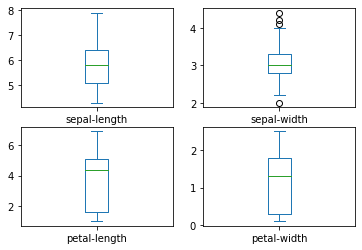

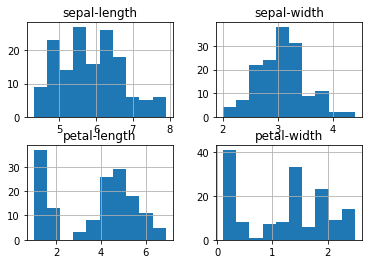

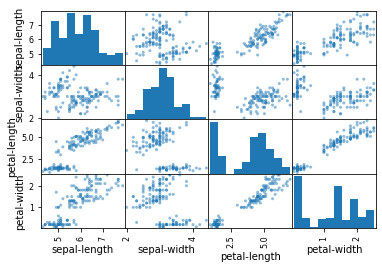

C:\tools\Anaconda3\envs\lama_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\tools\Anaconda3\envs\lama_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


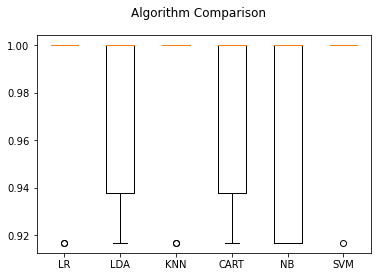

Model LR: Accuracy: 0.8666666666666667
Model: LR
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Classification Report: LR
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

Model LDA: Accuracy: 0.9666666666666667
Model: LDA
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
Classification Report: LDA
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97 

C:\tools\Anaconda3\envs\lama_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
filename = 'data/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial'))) #These parameters are set to prevent warnings.
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto'))) #Parameter set to prevent warnings.

# evaluate each model in turn and prints Accuracy
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg) # Prints accuracy

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

for name, model in models:
    model.fit(X_train, Y_train)
    predictions= model.predict(X_validation)
    print(f'Model {name}: Accuracy: {accuracy_score(Y_validation, predictions)}')
    print('Model: ' + name)
    print(confusion_matrix(Y_validation, predictions))
    print('Classification Report: ' + name)
    print(classification_report(Y_validation, predictions))

<div class="alert alert-block alert-success">
<b>Question:</b> Which algorithm would they choose. Explain your answer! 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b></div>














# Feedback (Mandatory!)

1) Summarize in three to five sentences what methods you have learned today. You might use some plots or prints if you want to.
We learned how to splitt data into either a train and a test dataset or into n-folds.Then we made a linear regression and learned about the Mean Absolute Error and the Mean Squared Error. In the end we made a logistic regression of the diabetes dataset and evalated our resulting model with different parameters. 

2) What do you think it is enableing you to do?
Now we can use simple Regression methodes to predict future values.We also understand how to rate the performance of a model.

3) Do you think this task was designed well? 
The Notebooks are well designed (3.) and it feels like you learn pretty much working trough them 

4) Where can we improve this task?
In the Beginning its a little unclear where your code should be.

5) Thanks for participating in LAMA! :)